In [2]:
import optuna

# You can use Matplotlib instead of Plotly for visualization by simply replacing `optuna.visualization` with
# `optuna.visualization.matplotlib` in the following examples.
from optuna.visualization.matplotlib import plot_contour
from optuna.visualization.matplotlib import plot_edf
from optuna.visualization.matplotlib import plot_intermediate_values
from optuna.visualization.matplotlib import plot_optimization_history
from optuna.visualization.matplotlib import plot_parallel_coordinate
from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_slice


In [3]:
pwd

'/lus/grand/projects/STlearn/4D_fMRI_Transformer/notebooks'

In [4]:
cd ..

/lus/grand/projects/STlearn/4D_fMRI_Transformer


In [5]:
# optuna_simplecnn_sex_bb_20220909
# optuna_simplecnn_ADHD_ab_20220910
study_name = 'debug_from_scratch_optuna_lrwd'
storage=optuna.storages.RDBStorage(
        url="sqlite:///{}.db".format(study_name),
        engine_kwargs={ "connect_args": {"timeout": 10}},
        skip_compatibility_check=True
        )
# study = optuna.create_study(study_name = 'optuna_simplecnn_ADHD_ab_20220910', 
#                                 sampler = optuna.samplers.RandomSampler(), #하이퍼 파라미터를 샘플링하는 방법
#                                 pruner = optuna.pruners.MedianPruner(n_startup_trials=0, n_warmup_steps=0, interval_steps=1),
#                                 storage = storage,                                
#                                 load_if_exists = True,
#                                 direction = 'maximize')
is_classification=True
study = optuna.create_study(study_name=study_name, sampler=optuna.samplers.RandomSampler(), pruner = optuna.pruners.MedianPruner(n_startup_trials=0, n_warmup_steps=5, interval_steps=1) ,storage=storage, load_if_exists=True, direction='maximize' if is_classification else 'minimize') 

df = study.trials_dataframe(attrs=("number", "value", "params", "state"))

[I 2022-11-14 05:49:50,427] Using an existing study with name 'debug_from_scratch_optuna_lrwd' instead of creating a new one.


In [6]:
df.loc[df.state=='COMPLETE',:]

,number,value,params_lr_init,params_weight_decay,state
12,12,0.0,0.000273,0.000058,COMPLETE
13,13,0.0,0.000572,0.005312,COMPLETE
14,14,0.0,0.000054,0.000094,COMPLETE
15,15,0.0,0.000877,0.003362,COMPLETE
16,16,0.0,0.000133,0.001761,COMPLETE
...,...,...,...,...,...
807,807,0.0,0.000113,0.000353,COMPLETE
808,808,0.0,0.000092,0.006335,COMPLETE
809,809,0.0,0.000304,0.001222,COMPLETE
810,810,0.0,0.000487,0.000882,COMPLETE


In [7]:
#pruned_trials

In [8]:
pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

print("Study statistics: ")
print("   Number of finished trials: ", len(study.trials))
print("   Number of pruned trials: ", len(pruned_trials))
print("   Number of complete trials: ", len(complete_trials))

print("Best trial:")
print('best trial info: {}'.format(study.best_trial))
print('best parameters: {}'.format(study.best_params))
print('best metric: {}'.format(study.best_value))

Study statistics: 
   Number of finished trials:  812
   Number of pruned trials:  0
   Number of complete trials:  800
Best trial:
best trial info: FrozenTrial(number=18, values=[0.5245977011494253], datetime_start=datetime.datetime(2022, 11, 13, 16, 42, 53, 570506), datetime_complete=datetime.datetime(2022, 11, 13, 17, 4, 7, 659672), params={'lr_init': 0.00023730767287435348, 'weight_decay': 7.164468661075737e-05}, distributions={'lr_init': LogUniformDistribution(high=0.001, low=4e-05), 'weight_decay': LogUniformDistribution(high=0.01, low=4e-05)}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.5}, trial_id=19, state=TrialState.COMPLETE, value=None)
best parameters: {'lr_init': 0.00023730767287435348, 'weight_decay': 7.164468661075737e-05}
best metric: 0.5245977011494253


### number = Trial의 번호, value= 해당 trial의 반환값 (최종성능), params=사용한 파라미터, intermediate_values = 중간성능값들

/tmp/ipykernel_140961/3324289224.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study)


<AxesSubplot:title={'center':'Optimization History Plot'}, xlabel='#Trials', ylabel='Objective Value'>

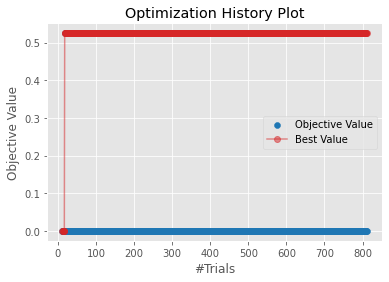

In [9]:
plot_optimization_history(study)

/tmp/ipykernel_140961/3988485508.py:1: ExperimentalWarning: plot_intermediate_values is experimental (supported from v2.2.0). The interface can change in the future.
  plot_intermediate_values(study)


<AxesSubplot:title={'center':'Intermediate Values Plot'}, xlabel='Step', ylabel='Intermediate Value'>

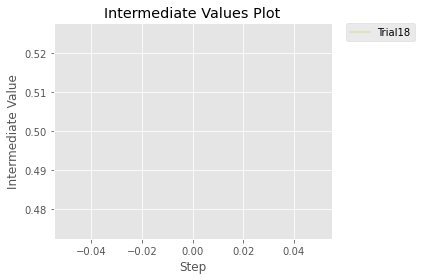

In [10]:
plot_intermediate_values(study)

/tmp/ipykernel_223865/805424619.py:1: ExperimentalWarning: plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.
  plot_parallel_coordinate(study, params=["network", "optim"])


<AxesSubplot:title={'center':'Parallel Coordinate Plot'}>

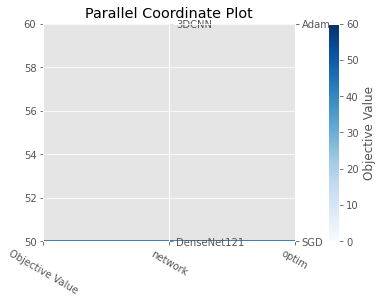

In [8]:
plot_parallel_coordinate(study, params=["network", "optim"])

/tmp/ipykernel_140961/1169262775.py:1: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  plot_contour(study, params=["lr_init", "weight_decay"])
[W 2022-11-14 05:51:41,635] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.
/home/junbeom/.conda/envs/3DCNN/lib/python3.9/site-packages/optuna/visualization/matplotlib/_contour.py:412: UserWarning: No contour levels were found within the data range.
  ax.contour(xi, yi, zi, 15, linewidths=0.5, colors="k")


<AxesSubplot:title={'center':'Contour Plot'}, xlabel='lr_init', ylabel='weight_decay'>

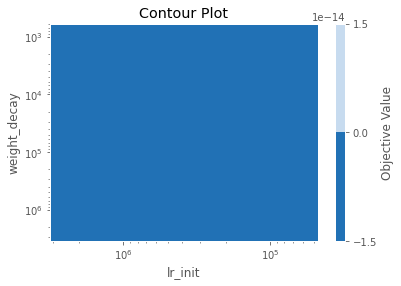

In [11]:
plot_contour(study, params=["lr_init", "weight_decay"])

/tmp/ipykernel_140961/3836449081.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study)


<AxesSubplot:title={'center':'Hyperparameter Importances'}, xlabel='Importance for Objective Value', ylabel='Hyperparameter'>

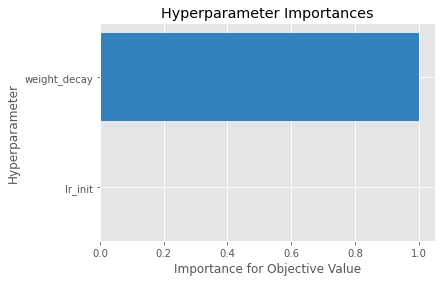

In [12]:
plot_param_importances(study)

/tmp/ipykernel_223865/2521976691.py:1: ExperimentalWarning: plot_edf is experimental (supported from v2.2.0). The interface can change in the future.
  plot_edf(study)


<AxesSubplot:title={'center':'Empirical Distribution Function Plot'}, xlabel='Objective Value', ylabel='Cumulative Probability'>

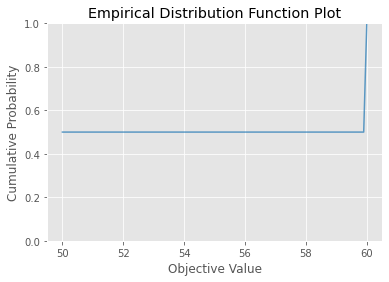

In [11]:
plot_edf(study)